In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

df= pd.read_csv('movies.csv')

In [2]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
#checking for missing values
for col in df.columns:
    pct_missing= np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
#Handling missing values
df= df.dropna()

In [5]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
#Changing datatype of columns
df['budget']= df['budget'].astype('int64')

df['gross']= df['gross'].astype('int64')

df['votes']= df['votes'].astype('int64')

df['runtime']= df['runtime'].astype('int64')

In [7]:
#Extracting correct year as in some rows year value in 'released' and 'year' columns are different
df['correct_year']= df['released'].astype(str).str.split().str[2]

In [8]:
df= df.dropna()

In [9]:
#Changing data type of 'correct_year' column to int
df['correct_year']= pd.to_numeric(df['correct_year'], errors='coerce').fillna(0).astype(int)

In [10]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [11]:
df.dtypes

name             object
rating           object
genre            object
year              int64
released         object
score           float64
votes             int64
director         object
writer           object
star             object
country          object
budget            int64
gross             int64
company          object
runtime           int64
correct_year      int32
dtype: object

In [12]:
#Sorting rows on the basis of gross collection of movies in descending order
df.sort_values(by=['gross'],inplace=False,ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85,1982


In [ ]:
#To display all rows of dataset

#pd.set_option('display.max_rows',None)

In [13]:
#Drop duplicates
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100,2020


C:\Users\91810\AppData\Local\Temp\ipykernel_3572\3423426632.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gross', y='name', data=highest_grossing_movies, palette='dark')


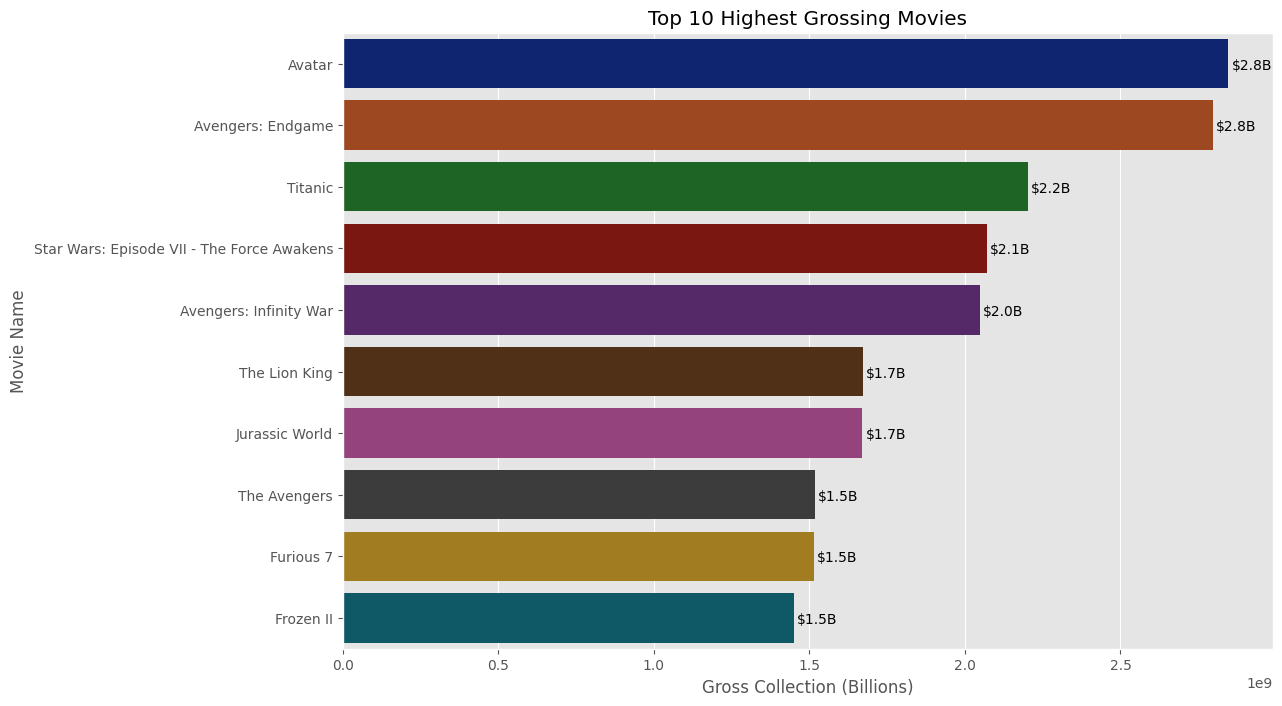

In [14]:
# Movies with highest gross collection
highest_grossing_movies = df.sort_values(by='gross', ascending=False).head(10)

# Create the bar plot
sns.barplot(x='gross', y='name', data=highest_grossing_movies, palette='dark')

# Add values of gross revenue inside the bar container with adjusted positions
for index, value in enumerate(highest_grossing_movies['gross']):
    plt.text(value + 1e7, index, f'${value/1e9:.1f}B', va='center_baseline')

# Set plot title and labels
plt.title('Top 10 Highest Grossing Movies')
plt.xlabel('Gross Collection (Billions)')
plt.ylabel('Movie Name')

# Show the plot
plt.show()# Identify highest grossing movies overall
highest_grossing_movies = df.sort_values(by='gross', ascending=False).head(10)


C:\Users\91810\AppData\Local\Temp\ipykernel_3572\3538845557.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='correct_year', y='gross', data=df, estimator=np.sum, ci=None, color='blue')


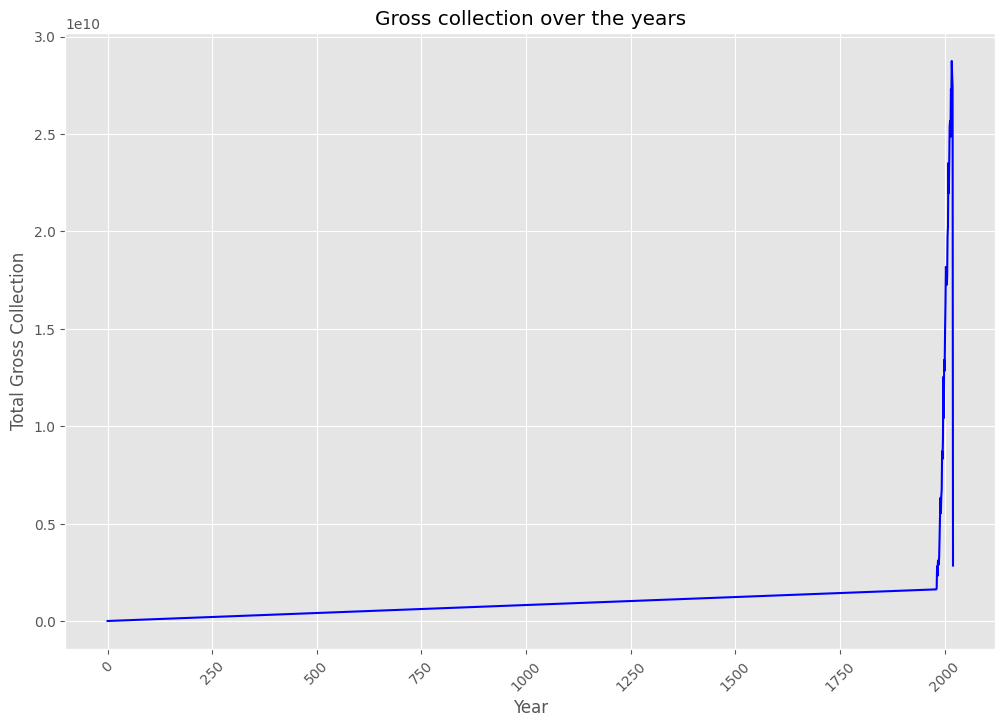

In [15]:
#Gross Revenue of Movies over the years
sns.lineplot(x='correct_year', y='gross', data=df, estimator=np.sum, ci=None, color='blue')
plt.title('Gross collection over the years')
plt.xlabel('Year')
plt.ylabel('Total Gross Collection')
plt.xticks(rotation=45)
plt.show()

C:\Users\91810\AppData\Local\Temp\ipykernel_3572\1702518179.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genre', y='gross', data=df, palette='bright')


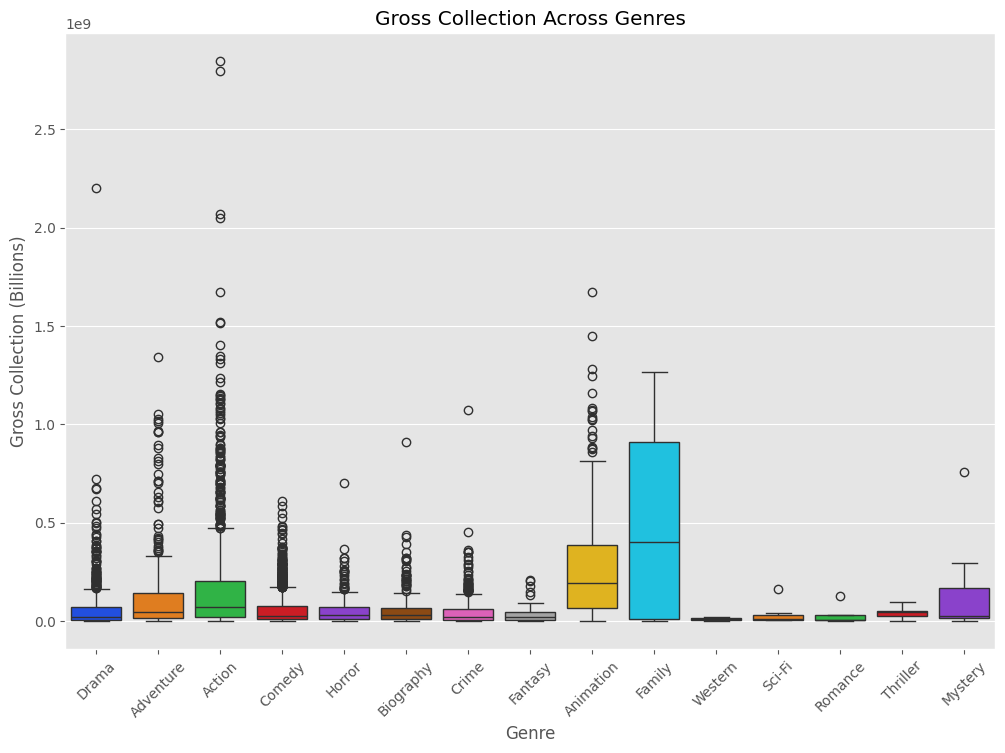

In [16]:
#Gross Collection in different genres
sns.boxplot(x='genre', y='gross', data=df, palette='bright')
plt.title('Gross Collection Across Genres')
plt.xlabel('Genre')
plt.ylabel('Gross Collection (Billions)')
plt.xticks(rotation=45)
plt.show()

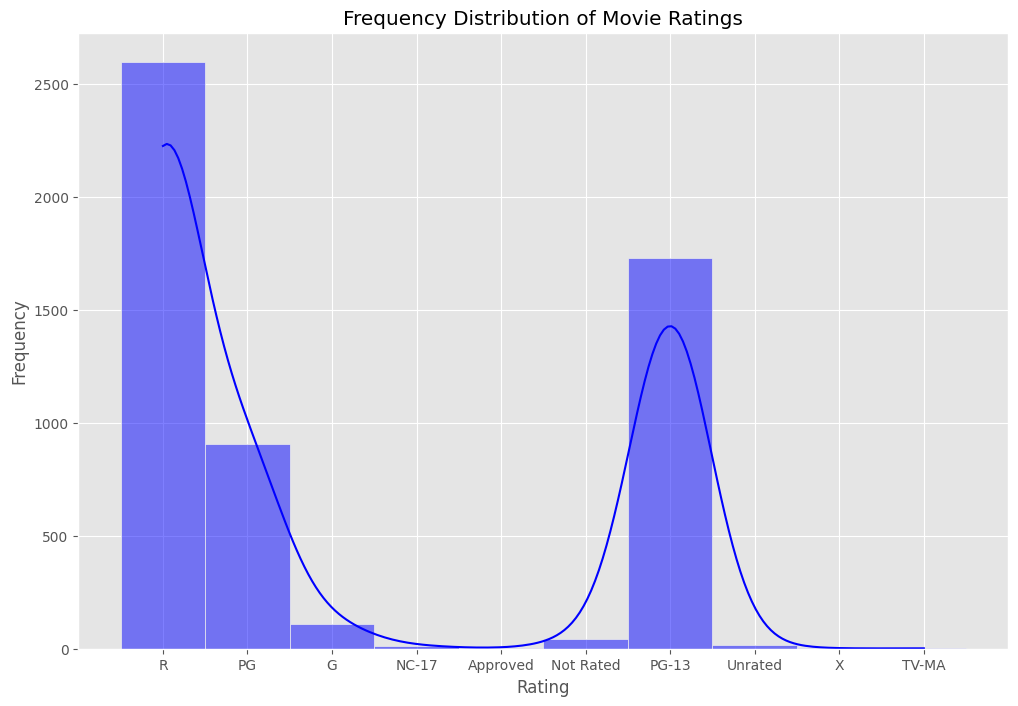

In [17]:
#Frequency Distribution of Movie Ratings
sns.histplot(df['rating'], bins=10, color='blue', kde=True)
plt.title('Frequency Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

C:\Users\91810\AppData\Local\Temp\ipykernel_3572\2092011924.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='genre', data=df, order=genre_count.index, palette='dark')


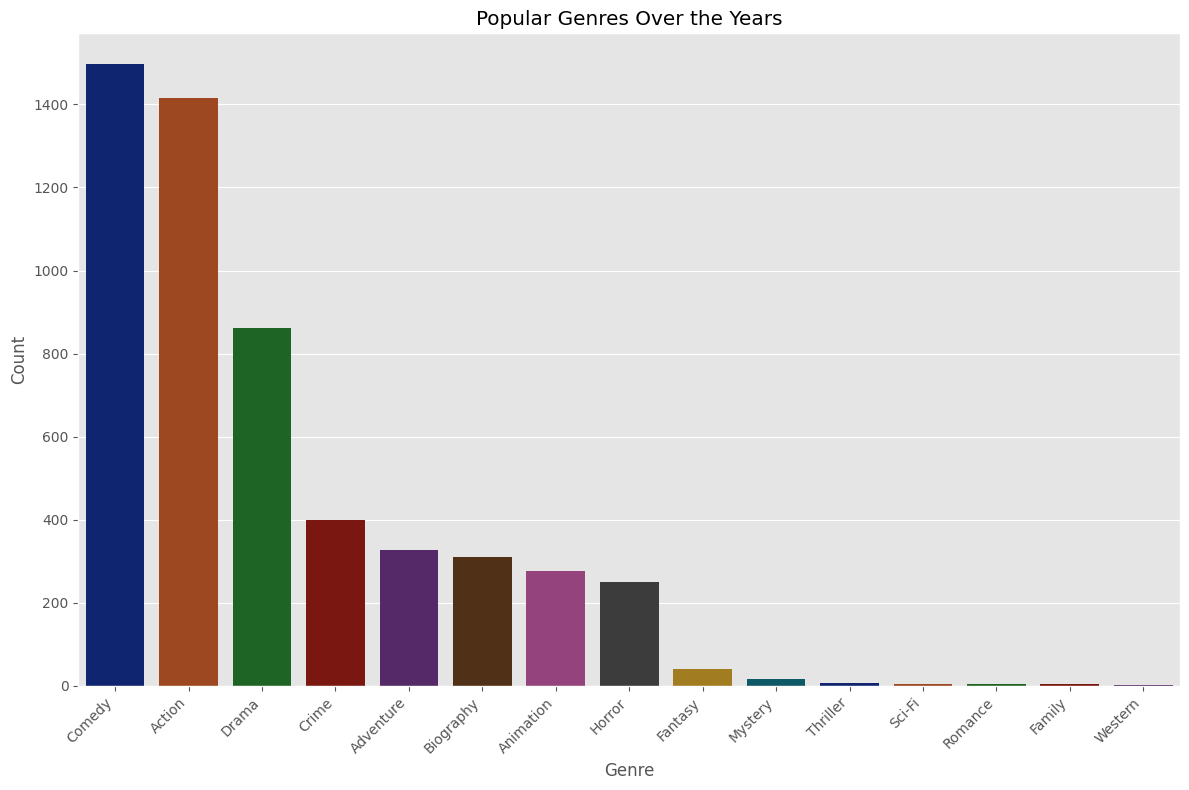

In [18]:
#Frequency Distribution of Genre in descending order
genre_count = df['genre'].value_counts().sort_values(ascending=False)

#Bar chart with the sorted genre counts
sns.countplot(x='genre', data=df, order=genre_count.index, palette='dark')
plt.title('Popular Genres Over the Years')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\91810\AppData\Local\Temp\ipykernel_3572\3901165951.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['genre'], y=df['gross'], order=median_gross_genre.index, palette='dark')


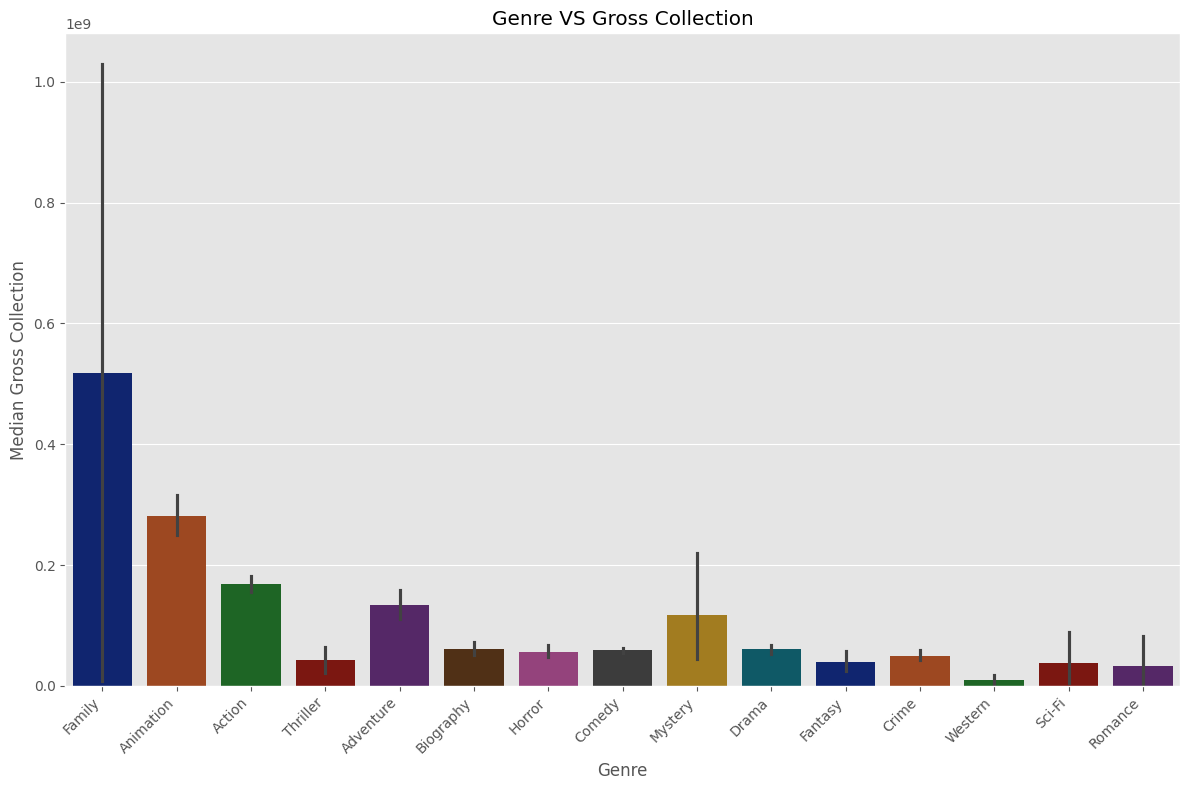

In [19]:
#Median gross collection for each genre in descending order
median_gross_genre = df.groupby('genre')['gross'].median().sort_values(ascending=False)

#Bar chart with the sorted genres
sns.barplot(x=df['genre'], y=df['gross'], order=median_gross_genre.index, palette='dark')
plt.title('Genre VS Gross Collection')
plt.xlabel('Genre')
plt.ylabel('Median Gross Collection')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\91810\AppData\Local\Temp\ipykernel_3572\4217018025.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='country', y='gross', data=df_top_10_countries, palette='dark')


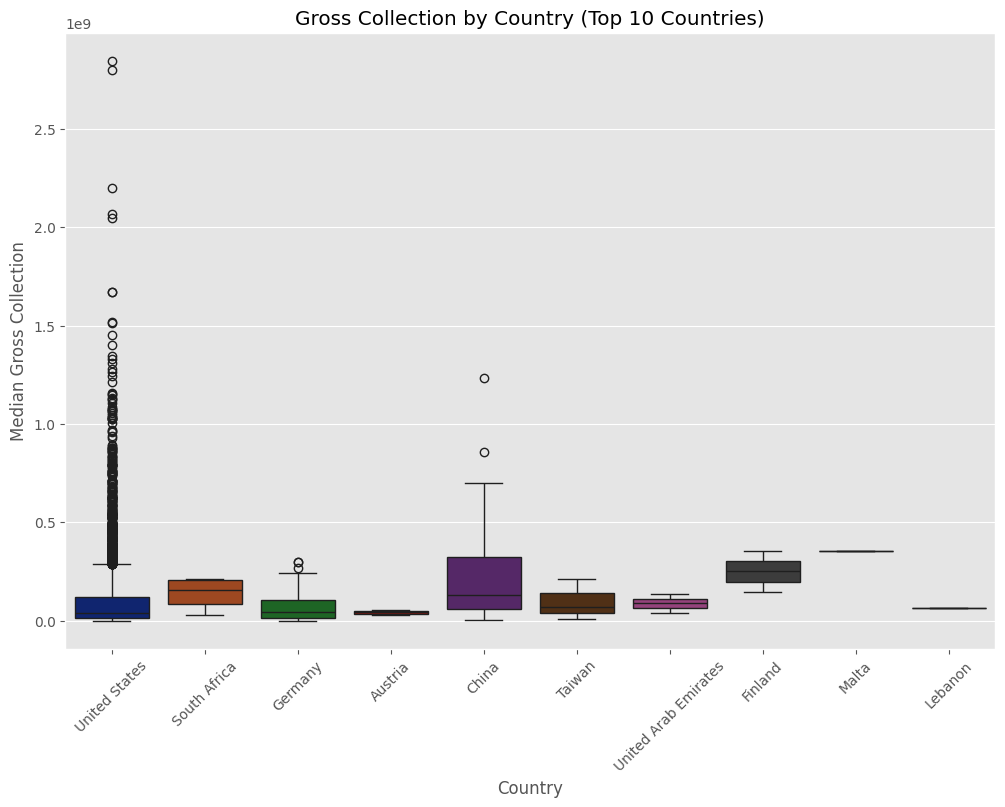

In [20]:
#Median Gross Collection in different countries in descending order
top_10_countries = df.groupby('country')['gross'].median().nlargest(10).index

# Filter the data to include only movies from the top 10 countries
df_top_10_countries = df[df['country'].isin(top_10_countries)]

#Boxplot with the filtered data
sns.boxplot(x='country', y='gross', data=df_top_10_countries, palette='dark')
plt.title('Gross Collection by Country (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Median Gross Collection')
plt.xticks(rotation=45)
plt.show()

C:\Users\91810\AppData\Local\Temp\ipykernel_3572\2875713796.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=director_avg_revenue_millions.values, y=director_avg_revenue.index, palette='dark')


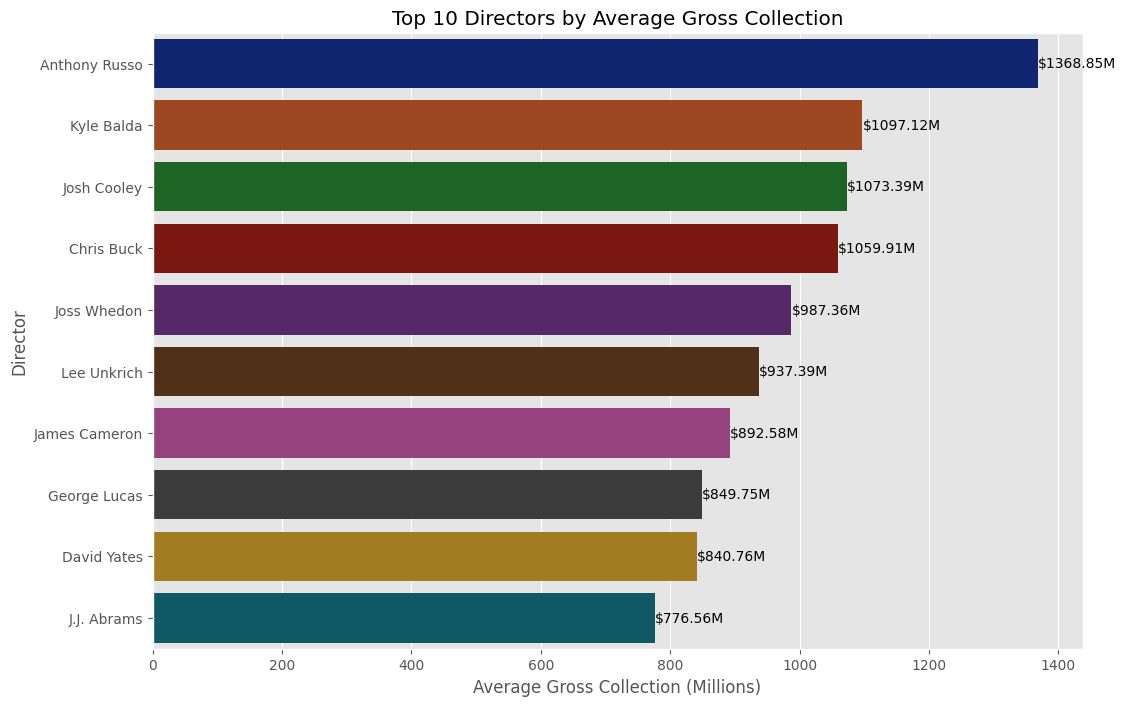

In [21]:
#Average Gross Collection of each director
director_avg_revenue = df.groupby('director')['gross'].mean().nlargest(10)

# Convert the average revenue to millions
director_avg_revenue_millions = director_avg_revenue / 1e6  # Divide by 1 million to convert to millions

# Plot the bar chart
barplot = sns.barplot(x=director_avg_revenue_millions.values, y=director_avg_revenue.index, palette='dark')

# Add revenue values inside the bar chart
for index, value in enumerate(director_avg_revenue):
    barplot.text(value / 1e6, index, f'${value / 1e6:.2f}M', va='center')

plt.title('Top 10 Directors by Average Gross Collection')
plt.xlabel('Average Gross Collection (Millions)')
plt.ylabel('Director')
plt.show()

C:\Users\91810\AppData\Local\Temp\ipykernel_3572\3500078952.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=star_total_gross_millions.values, y=star_total_gross.index, palette='dark')


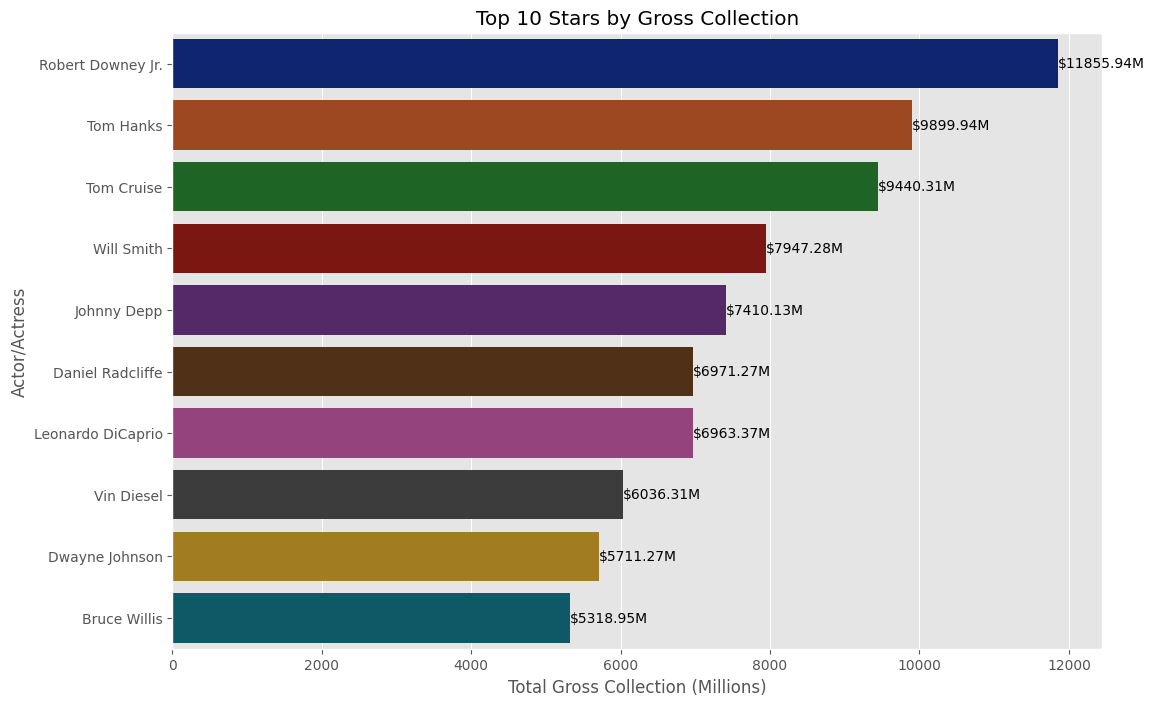

In [22]:
#Total gross collection for each movie star
star_total_gross = df.groupby('star')['gross'].sum().nlargest(10)

#Convert the total gross revenue to millions
star_total_gross_millions = star_total_gross / 1e6  # Divide by 1 million to convert to millions

#Bar chart
barplot = sns.barplot(x=star_total_gross_millions.values, y=star_total_gross.index, palette='dark')

#Add gross collection values inside the bar chart
for index, value in enumerate(star_total_gross):
    barplot.text(value / 1e6, index, f'${value / 1e6:.2f}M', va='center')

plt.title('Top 10 Stars by Gross Collection')
plt.xlabel('Total Gross Collection (Millions)')
plt.ylabel('Actor/Actress')
plt.show()

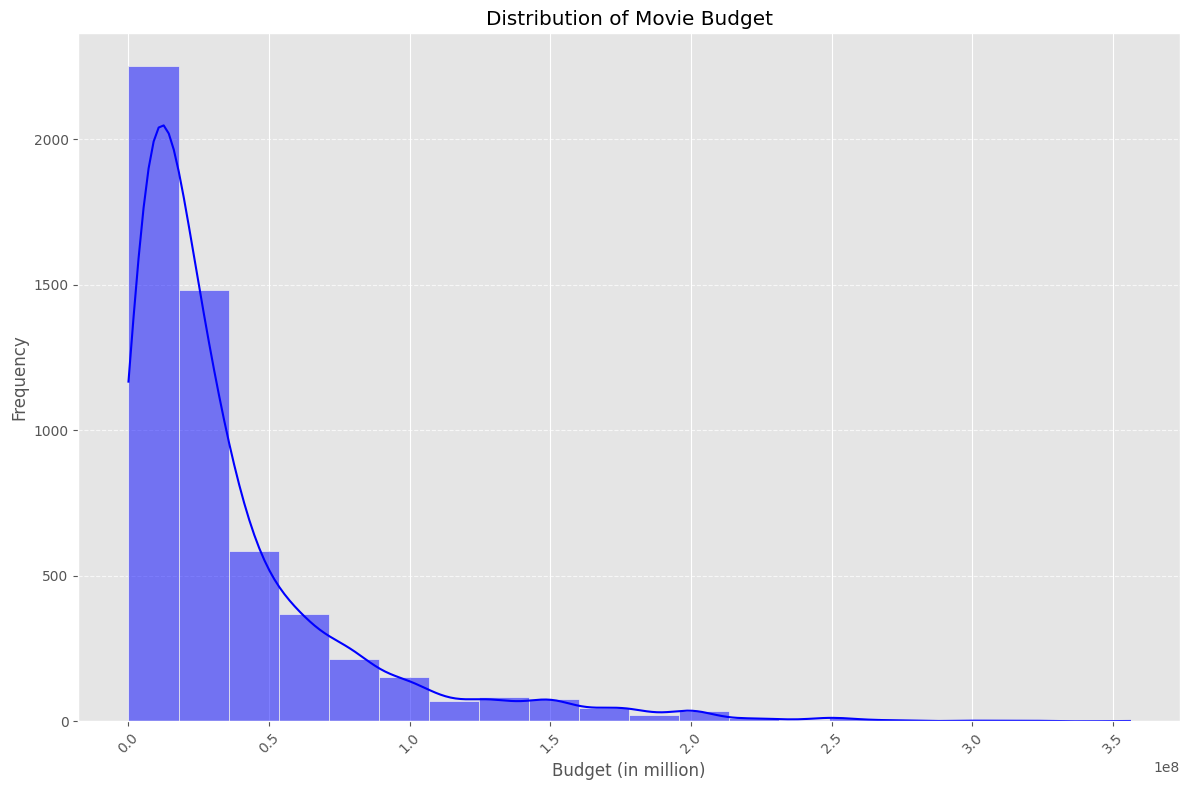

In [23]:
# Distribution of movie budget
sns.histplot(df['budget'], bins=20, color='blue', kde=True)
plt.title('Distribution of Movie Budget')
plt.xlabel('Budget (in million)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

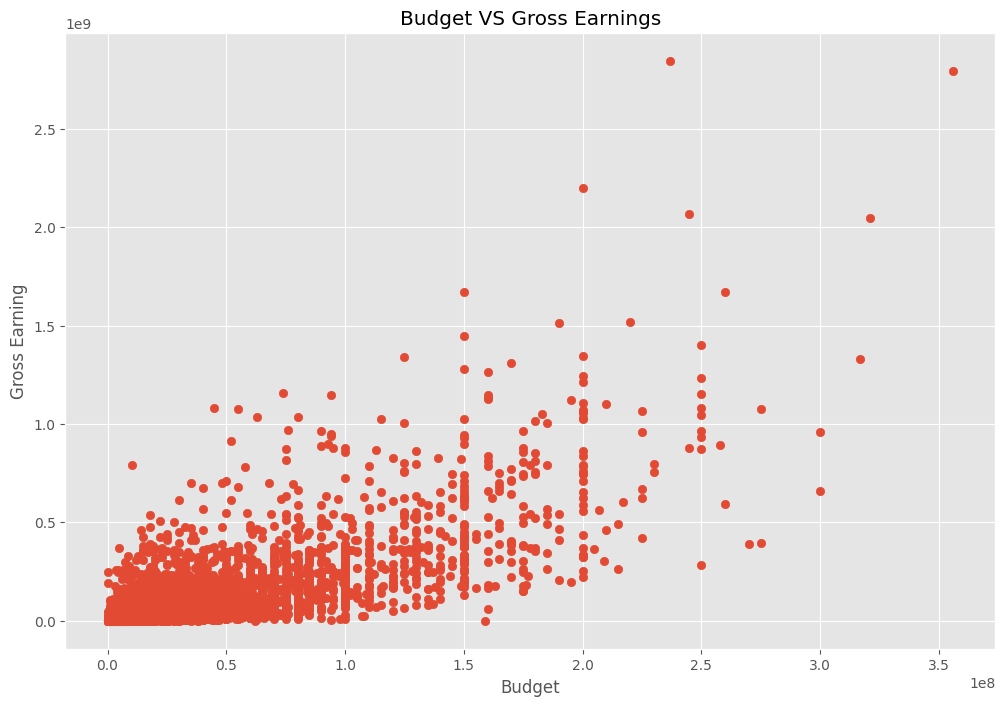

In [24]:
#Scatter plot to check correlation between budget and gross earnings
plt.scatter(x=df['budget'],y=df['gross'])

plt.title('Budget VS Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earning')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

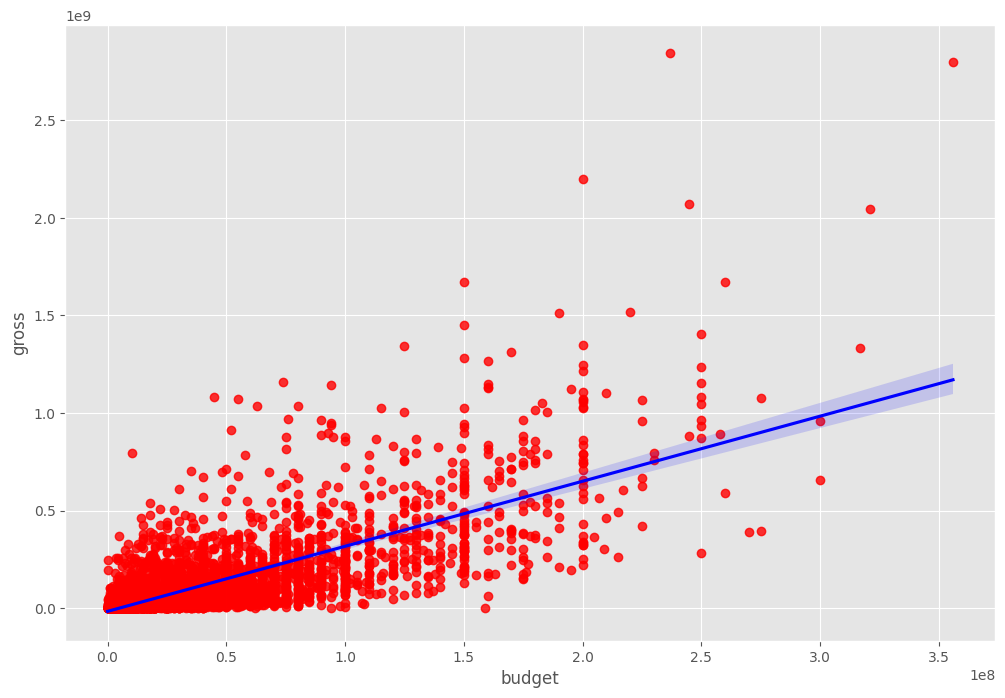

In [25]:
#To show regression line in budget vs gross scatter plot
sns.regplot(x='budget',y='gross',data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

<Axes: xlabel='score', ylabel='gross'>

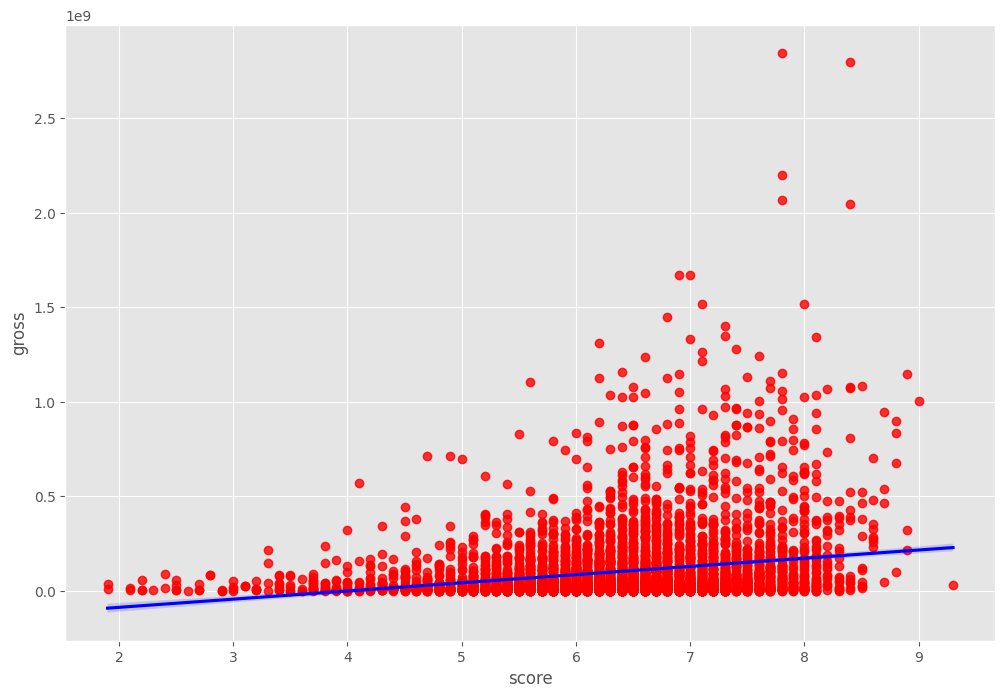

In [26]:
#Score vs Gross
sns.regplot(x='score',y='gross',data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

C:\Users\91810\AppData\Local\Temp\ipykernel_3572\429005583.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='correct_year', y='gross', data=df, estimator=np.mean, ci=None, color='blue')


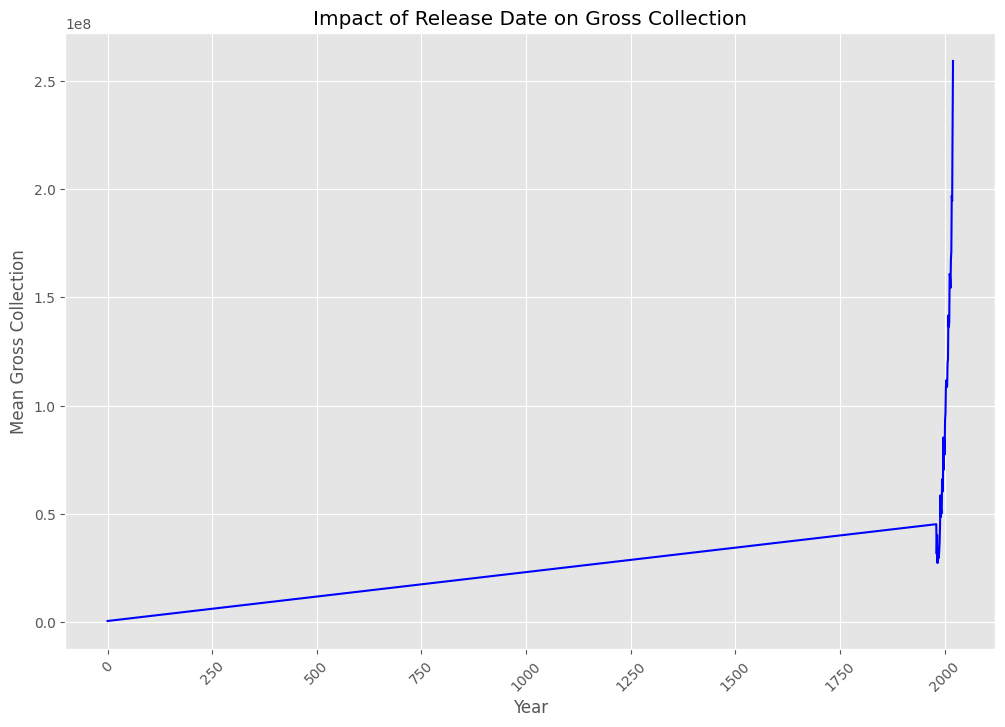

In [27]:
# Impact of release date on gross collection
sns.lineplot(x='correct_year', y='gross', data=df, estimator=np.mean, ci=None, color='blue')
plt.title('Impact of Release Date on Gross Collection')
plt.xlabel('Year')
plt.ylabel('Mean Gross Collection')
plt.xticks(rotation=45)
plt.show()

C:\Users\91810\AppData\Local\Temp\ipykernel_3572\116453466.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=company_gross.values, y=company_gross.index, palette='dark')


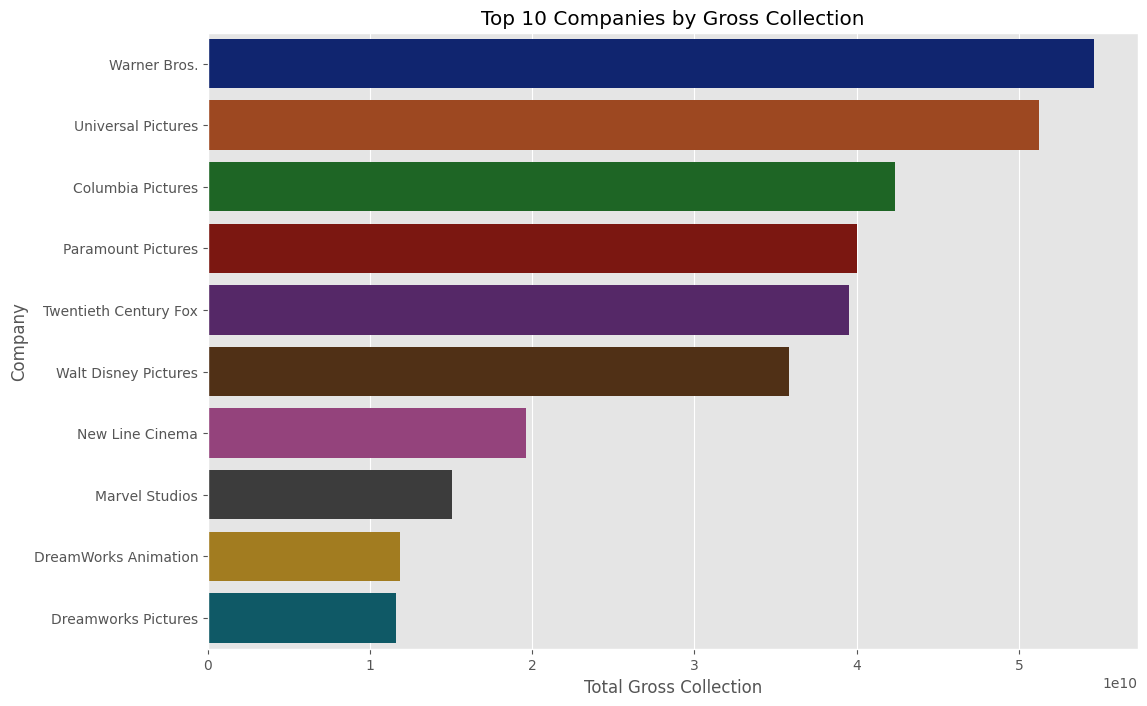

In [35]:
# Performance comparison of different production companies
company_gross = df.groupby('company')['gross'].sum().nlargest(10)

sns.barplot(x=company_gross.values, y=company_gross.index, palette='dark')
plt.title('Top 10 Companies by Gross Collection')
plt.xlabel('Total Gross Collection')
plt.ylabel('Company')
plt.show()

C:\Users\91810\AppData\Local\Temp\ipykernel_3572\2766822622.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='company', y='gross', data=df_top_companies, order=sorted_companies, palette='dark')


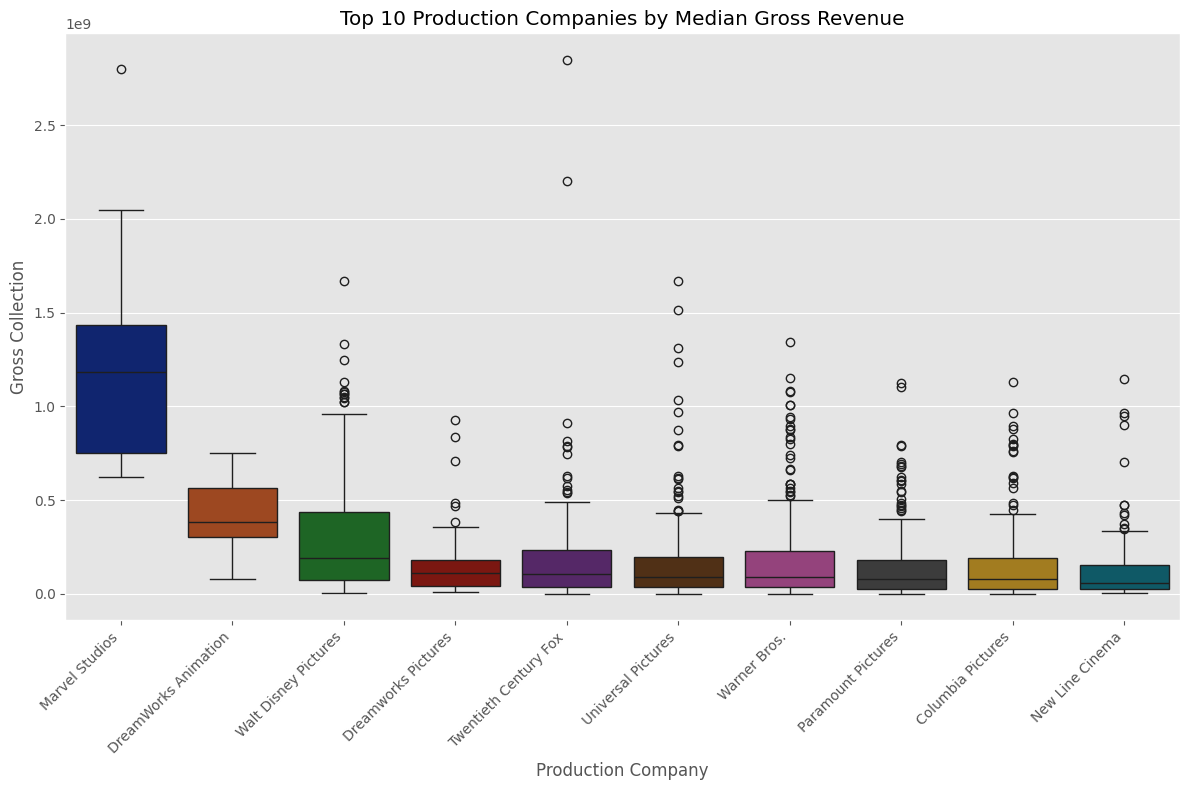

In [29]:
#Top 10 Companies based on Total Gross Collection
top_companies = df.groupby('company')['gross'].sum().nlargest(10).index

# Filter the data to include only the top 10 companies
df_top_companies = df[df['company'].isin(top_companies)]

# Sort the production companies based on their median gross revenue
median_gross_by_company = df_top_companies.groupby('company')['gross'].median()
sorted_companies = median_gross_by_company.sort_values(ascending=False).index

# Plot the boxplot with the sorted production companies
plt.figure(figsize=(12, 8))
sns.boxplot(x='company', y='gross', data=df_top_companies, order=sorted_companies, palette='dark')
plt.title(f'Top {10} Production Companies by Median Gross Revenue')
plt.xlabel('Production Company')
plt.ylabel('Gross Collection')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

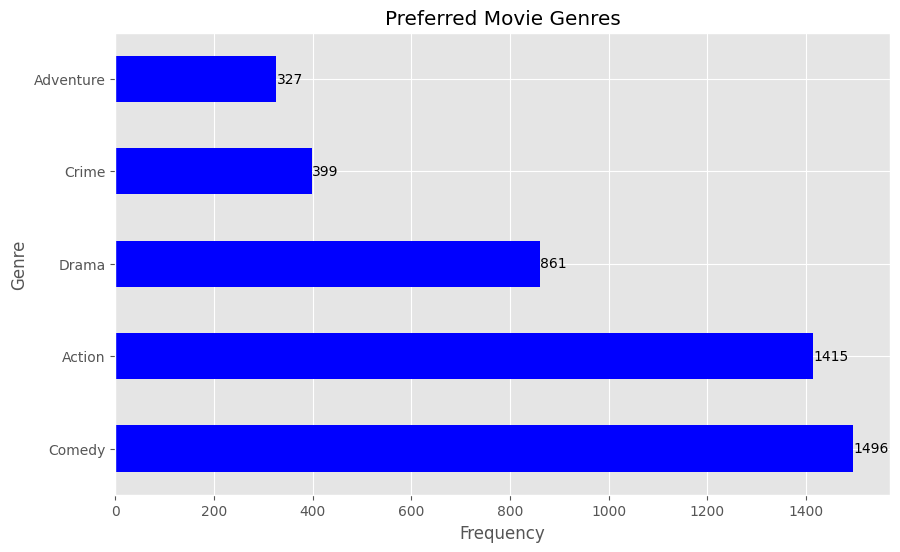

In [30]:
# Preferred genre among viewers
preferred_genre = df['genre'].value_counts().nlargest(5)
plt.figure(figsize=(10, 6))
preferred_genre.plot(kind='barh', color='blue')
plt.title('Preferred Movie Genres')
plt.xlabel('Frequency')
plt.ylabel('Genre')
# Add value labels to the bars
for index, value in enumerate(preferred_genre):
    plt.text(value, index, str(value), va='center')
plt.show()

In [31]:
#Correlation method 1: Pearson
df.corr(method='pearson',numeric_only=True)

,year,score,votes,budget,gross,runtime,correct_year
year,1.000000,0.056470,0.205827,0.327595,0.274181,0.074963,0.158274
score,0.056470,1.000000,0.474485,0.072208,0.222715,0.414524,0.027118
votes,0.205827,0.474485,1.000000,0.439594,0.614705,0.352240,0.049875
budget,0.327595,0.072208,0.439594,1.000000,0.740218,0.318568,0.070481
gross,0.274181,0.222715,0.614705,0.740218,1.000000,0.275723,0.055478
runtime,0.074963,0.414524,0.352240,0.318568,0.275723,1.000000,0.022974
correct_year,0.158274,0.027118,0.049875,0.070481,0.055478,0.022974,1.000000


In [32]:
#Correlation method 1: Kendall
df.corr(method='kendall',numeric_only=True)

,year,score,votes,budget,gross,runtime,correct_year
year,1.000000,0.039440,0.296179,0.220732,0.239225,0.064779,0.989826
score,0.039440,1.000000,0.350567,-0.006115,0.125205,0.292681,0.044320
votes,0.296179,0.350567,1.000000,0.346135,0.553395,0.205274,0.293977
budget,0.220732,-0.006115,0.346135,1.000000,0.511989,0.231037,0.215392
gross,0.239225,0.125205,0.553395,0.511989,1.000000,0.176845,0.234280
runtime,0.064779,0.292681,0.205274,0.231037,0.176845,1.000000,0.065479
correct_year,0.989826,0.044320,0.293977,0.215392,0.234280,0.065479,1.000000


In [33]:
#Correlation method 1: Spearman
df.corr(method='spearman',numeric_only=True)

,year,score,votes,budget,gross,runtime,correct_year
year,1.000000,0.057808,0.427195,0.312677,0.350606,0.095363,0.997847
score,0.057808,1.000000,0.495942,-0.009548,0.183580,0.412813,0.065038
votes,0.427195,0.495942,1.000000,0.493256,0.745566,0.300514,0.424341
budget,0.312677,-0.009548,0.493256,1.000000,0.692871,0.330494,0.304637
gross,0.350606,0.183580,0.745566,0.692871,1.000000,0.257203,0.342874
runtime,0.095363,0.412813,0.300514,0.330494,0.257203,1.000000,0.096473
correct_year,0.997847,0.065038,0.424341,0.304637,0.342874,0.096473,1.000000


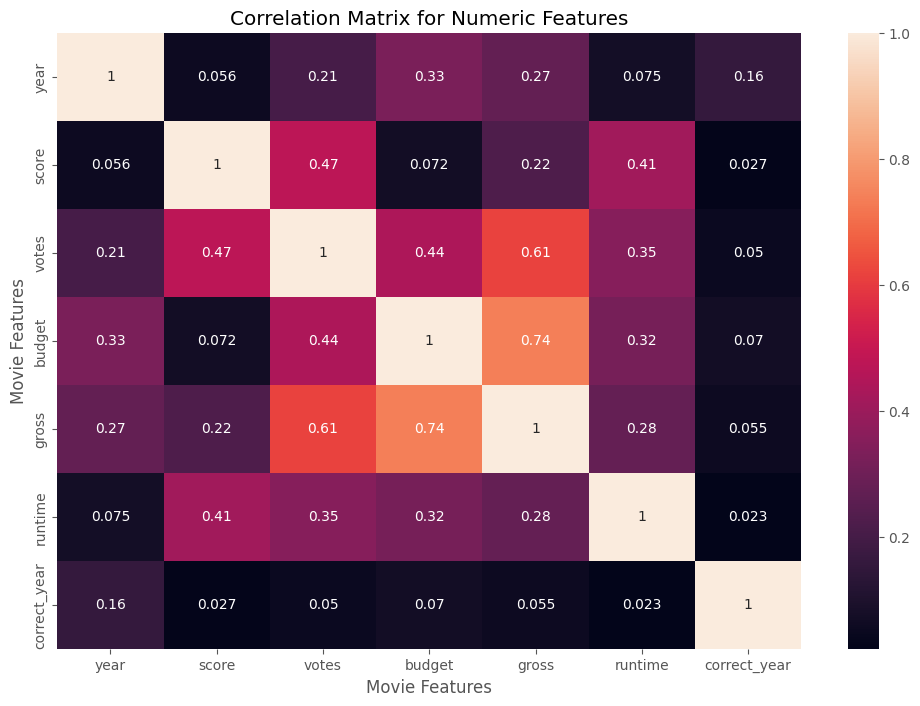

In [34]:
#Heatmap for numeric values
corr_matrix= df.corr(numeric_only=True)

sns.heatmap(corr_matrix,annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

We see that 'votes' and 'budget' have maximum correlation with 'gross'